In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import tensorflow as tf
from tensorflow import keras

dataset_path = "/content/drive/MyDrive/Dataset/data/natural_images"  # Change this to your folder path

# Load images as a dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=(128, 128),  # Resize images
    batch_size=32
)

# Optional: Split into train/validation
train_ds = train_dataset.take(int(len(train_dataset)*0.8))
val_ds = train_dataset.skip(int(len(train_dataset)*0.8))

# Show class names
class_names = train_dataset.class_names
print("Classes:", class_names)

Found 6899 files belonging to 8 classes.
Classes: ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


In [14]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # Output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,792 (432.78 KB)

 Trainable params: 110,792 (432.78 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 975s 6s/step - accuracy: 0.2863 - loss: 1.8161 - val_accuracy: 0.5563 - val_loss: 1.2061
Epoch 2/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.5906 - loss: 1.1542 - val_accuracy: 0.6688 - val_loss: 0.9285
Epoch 3/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.6947 - loss: 0.8437 - val_accuracy: 0.6925 - val_loss: 0.8691
Epoch 4/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.7312 - loss: 0.7195 - val_accuracy: 0.7685 - val_loss: 0.6245
Epoch 5/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.7765 - loss: 0.6067 - val_accuracy: 0.7914 - val_loss: 0.5309
Epoch 6/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.7999 - loss: 0.5305 - val_accuracy: 0.8072 - val_loss: 0.5056
Epoch 7/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.8244 - loss: 0.4838 - val_accuracy: 0.8344 - val_loss: 0.4593
Epoch 8/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.8256 - loss: 0.4609 - val_accu

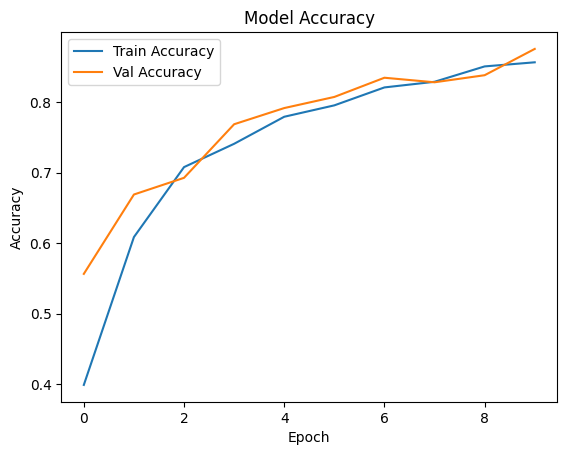

In [16]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [17]:
model.save('custom_cnn_model.h5')